### Equipo: 

- Nombre de alumno 1: Nicolas Herrera
- Nombre de alumno 2: Lucas Carrasco

### **Link de repositorio de GitHub:** [Insertar Repositorio](https://github.com/vspartamo/MDS7202)

### Indice

1. [Análisis Exploratorio de Datos](#Análisisexploratoriodedatos:)

# Análsis exploratorio de datos


Se realiza un análisis exploratorio de datos para identificar patrones, tendencias y relaciones en ellos. Esto para comprender mejor las características del conjunto de datos y guiar las siguientes decisiones en el pipeline de modelamiento.

In [ ]:
%pip install pyarrow pandas scikit-learn matplotlib seaborn

In [2]:
# Se importan las librerías básicas para trabajar los datos y visualizarlos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
DATA_PATH = "data/"
X_t0 = pd.read_parquet(DATA_PATH + "X_t0.parquet")
y_t0 = pd.read_parquet(DATA_PATH + "y_t0.parquet")

df_t0 = pd.concat([X_t0, y_t0], axis=1)
df_t0.head()

,borrow_block_number,borrow_timestamp,wallet_address,first_tx_timestamp,last_tx_timestamp,wallet_age,incoming_tx_count,outgoing_tx_count,net_incoming_tx_count,total_gas_paid_eth,...,market_max_drawdown_365d,market_natr,market_plus_di,market_plus_dm,market_ppo,market_rocp,market_rocr,unique_borrow_protocol_count,unique_lending_protocol_count,target
0,7711117,1.557197e+09,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,1.537224e+09,1.557197e+09,19973049.0,199,438,-239,0.397391,...,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,0,1,1
1,7711123,1.557197e+09,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,1.537224e+09,1.557197e+09,19973188.0,200,439,-239,0.399063,...,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,1,1,1
2,7711126,1.557197e+09,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,1.537224e+09,1.557197e+09,19973238.0,201,440,-239,0.400895,...,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,1,1,1
3,7711672,1.557205e+09,0xa7ff0d561cd15ed525e31bbe0af3fe34ac2059f6,1.557191e+09,1.557198e+09,13922.0,8,56,-48,0.604001,...,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,0,1,0
4,7712572,1.557217e+09,0xbd9ed130a53cfafcf81502e4d35329a6c4d53410,1.557217e+09,1.557217e+09,264.0,2,3,-1,0.003008,...,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,0,1,0


In [4]:
df_t0.columns

Index(['borrow_block_number', 'borrow_timestamp', 'wallet_address',
       'first_tx_timestamp', 'last_tx_timestamp', 'wallet_age',
       'incoming_tx_count', 'outgoing_tx_count', 'net_incoming_tx_count',
       'total_gas_paid_eth', 'avg_gas_paid_per_tx_eth', 'risky_tx_count',
       'risky_unique_contract_count', 'risky_first_tx_timestamp',
       'risky_last_tx_timestamp', 'risky_first_last_tx_timestamp_diff',
       'risky_sum_outgoing_amount_eth', 'outgoing_tx_sum_eth',
       'incoming_tx_sum_eth', 'outgoing_tx_avg_eth', 'incoming_tx_avg_eth',
       'max_eth_ever', 'min_eth_ever', 'total_balance_eth', 'risk_factor',
       'total_collateral_eth', 'total_collateral_avg_eth',
       'total_available_borrows_eth', 'total_available_borrows_avg_eth',
       'avg_weighted_risk_factor', 'risk_factor_above_threshold_daily_count',
       'avg_risk_factor', 'max_risk_factor', 'borrow_amount_sum_eth',
       'borrow_amount_avg_eth', 'borrow_count', 'repay_amount_sum_eth',
       'repay_am

Se entrega una breve descripción de cada una de las 78 columnas:
#### **Datos generales del wallet**
- **`borrow_block_number`**: Número del bloque en el que ocurrió el préstamo más reciente asociado al monedero.
- **`borrow_timestamp`**: Marca de tiempo (timestamp) del préstamo más reciente.
- **`wallet_address`**: Dirección del monedero que identifica al usuario.
- **`first_tx_timestamp`**: Timestamp de la primera transacción registrada para este monedero.
- **`last_tx_timestamp`**: Timestamp de la última transacción registrada.
- **`wallet_age`**: Tiempo total desde la primera transacción hasta la fecha actual, generalmente en días o meses.

#### **Estadísticas de transacciones**
- **`incoming_tx_count`**: Número total de transacciones entrantes al monedero.
- **`outgoing_tx_count`**: Número total de transacciones salientes desde el monedero.
- **`net_incoming_tx_count`**: Diferencia entre las transacciones entrantes y salientes.
- **`total_gas_paid_eth`**: Cantidad total de gas pagado en ETH por todas las transacciones.
- **`avg_gas_paid_per_tx_eth`**: Promedio de gas pagado por transacción, expresado en ETH.

#### **Datos sobre transacciones riesgosas**
- **`risky_tx_count`**: Número de transacciones clasificadas como riesgosas.
- **`risky_unique_contract_count`**: Número de contratos únicos involucrados en transacciones riesgosas.
- **`risky_first_tx_timestamp`**: Timestamp de la primera transacción riesgosa.
- **`risky_last_tx_timestamp`**: Timestamp de la última transacción riesgosa.
- **`risky_first_last_tx_timestamp_diff`**: Diferencia temporal entre la primera y la última transacción riesgosa.
- **`risky_sum_outgoing_amount_eth`**: Suma de ETH enviados en transacciones riesgosas.

#### **Estadísticas de ETH en el monedero**
- **`outgoing_tx_sum_eth`**: Suma total de ETH enviados en todas las transacciones salientes.
- **`incoming_tx_sum_eth`**: Suma total de ETH recibidos en todas las transacciones entrantes.
- **`outgoing_tx_avg_eth`**: Promedio de ETH enviados por transacción saliente.
- **`incoming_tx_avg_eth`**: Promedio de ETH recibidos por transacción entrante.
- **`max_eth_ever`**: Máximo balance de ETH alcanzado en el monedero.
- **`min_eth_ever`**: Mínimo balance de ETH registrado en el monedero.
- **`total_balance_eth`**: Balance actual del monedero en ETH.
- **`risk_factor`**: Indicador del nivel de riesgo asociado al monedero, basado en algún modelo de análisis.

#### **Estadísticas de préstamos y colaterales**
- **`total_collateral_eth`**: Suma total de ETH utilizados como colateral.
- **`total_collateral_avg_eth`**: Promedio de ETH usados como colateral por préstamo.
- **`total_available_borrows_eth`**: Monto total de ETH disponible para préstamo.
- **`total_available_borrows_avg_eth`**: Promedio de ETH disponibles para préstamo.
- **`avg_weighted_risk_factor`**: Factor de riesgo ponderado promedio.
- **`risk_factor_above_threshold_daily_count`**: Número de días en los que el factor de riesgo estuvo por encima de un umbral predefinido.
- **`avg_risk_factor`**: Promedio del factor de riesgo del monedero.
- **`max_risk_factor`**: Máximo valor del factor de riesgo registrado.
- **`borrow_amount_sum_eth`**: Suma total de ETH prestados.
- **`borrow_amount_avg_eth`**: Promedio de ETH prestados por transacción.
- **`borrow_count`**: Número total de transacciones de préstamo.
- **`repay_amount_sum_eth`**: Suma total de ETH devueltos.
- **`repay_amount_avg_eth`**: Promedio de ETH devueltos por transacción.
- **`repay_count`**: Número total de transacciones de devolución.
- **`borrow_repay_diff_eth`**: Diferencia entre ETH prestados y devueltos.

#### **Estadísticas de depósitos y retiros**
- **`deposit_count`**: Número de transacciones de depósito realizadas.
- **`deposit_amount_sum_eth`**: Suma total de ETH depositados.
- **`time_since_first_deposit`**: Tiempo transcurrido desde el primer depósito.
- **`withdraw_amount_sum_eth`**: Suma total de ETH retirados.
- **`withdraw_deposit_diff_if_positive_eth`**: Diferencia positiva entre ETH retirados y depositados.
- **`liquidation_count`**: Número de veces que el monedero fue liquidado.
- **`time_since_last_liquidated`**: Tiempo transcurrido desde la última liquidación.
- **`liquidation_amount_sum_eth`**: Suma total de ETH liquidados.

#### **Indicadores del mercado**
- **`market_adx`, `market_adxr`, `market_apo`, etc.**: Indicadores técnicos basados en análisis del mercado, como fuerza direccional (ADX), Momentum, osciladores (Aroon), volatilidad (ATR), fuerza relativa (CCI), entre otros. Estos se usan comúnmente para evaluar tendencias o comportamientos del mercado.

#### **Estadísticas adicionales**
- **`unique_borrow_protocol_count`**: Número de protocolos de préstamos únicos utilizados.
- **`unique_lending_protocol_count`**: Número de protocolos de préstamos ofrecidos.
- **`target`**: Variable objetivo, posiblemente para un modelo de predicción (como riesgo de impago o clasificación).

### **Limpieza de los datos**

Se remueve las columnas que corresponden a identificadores o no aportan información relevante **complementar o corregir esto**

In [5]:
columns_to_drop = [
    'borrow_block_number',
    'wallet_address',
    'borrow_timestamp',
    'first_tx_timestamp',
    'last_tx_timestamp',
    'risky_first_tx_timestamp',
    'risky_last_tx_timestamp',
    'unique_borrow_protocol_count',
    'unique_lending_protocol_count',
]

df_t0_columns_dropped = df_t0.drop(columns=columns_to_drop, inplace=False)

df_t0_columns_dropped.shape

(44296, 69)

In [7]:
sum(df_t0_columns_dropped.isna().sum() > 0)

0

In [22]:
df_t0_columns_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44296 entries, 0 to 44295
Data columns (total 69 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   wallet_age                               44296 non-null  float64
 1   incoming_tx_count                        44296 non-null  int64  
 2   outgoing_tx_count                        44296 non-null  int64  
 3   net_incoming_tx_count                    44296 non-null  int64  
 4   total_gas_paid_eth                       44296 non-null  float64
 5   avg_gas_paid_per_tx_eth                  44296 non-null  float64
 6   risky_tx_count                           44296 non-null  int64  
 7   risky_unique_contract_count              44296 non-null  int64  
 8   risky_first_last_tx_timestamp_diff       44296 non-null  int64  
 9   risky_sum_outgoing_amount_eth            44296 non-null  float64
 10  outgoing_tx_sum_eth                      44296

In [23]:
numeric_features = df_t0_columns_dropped.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df_t0_columns_dropped.select_dtypes(include=['object']).columns

In [31]:
print(df_t0_columns_dropped.describe())

         wallet_age  incoming_tx_count  outgoing_tx_count  \
count  4.429600e+04       44296.000000       44296.000000   
mean   2.943773e+07         999.369514        1360.256231   
std    2.897753e+07        3065.153260        3936.526950   
min    1.370000e+02           1.000000           0.000000   
25%    3.641601e+06          34.000000          52.000000   
50%    1.900256e+07         134.000000         207.000000   
75%    5.196818e+07         471.000000         678.000000   
max    1.540836e+08       98747.000000       71087.000000   

       net_incoming_tx_count  total_gas_paid_eth  avg_gas_paid_per_tx_eth  \
count           44296.000000        44296.000000             44296.000000   
mean             -360.886717            2.717345                 0.002874   
std              2167.545039           13.380028                 0.008137   
min            -68013.000000            0.000000                 0.000000   
25%              -198.000000            0.076647                 

Se estudia la relación de correlación entre los datos con el fin de quitar columnas en caso de que haya columnas con una correlación muy alta, y por lo tanto redundantes, o bien, existan variables con alta correlación a target.

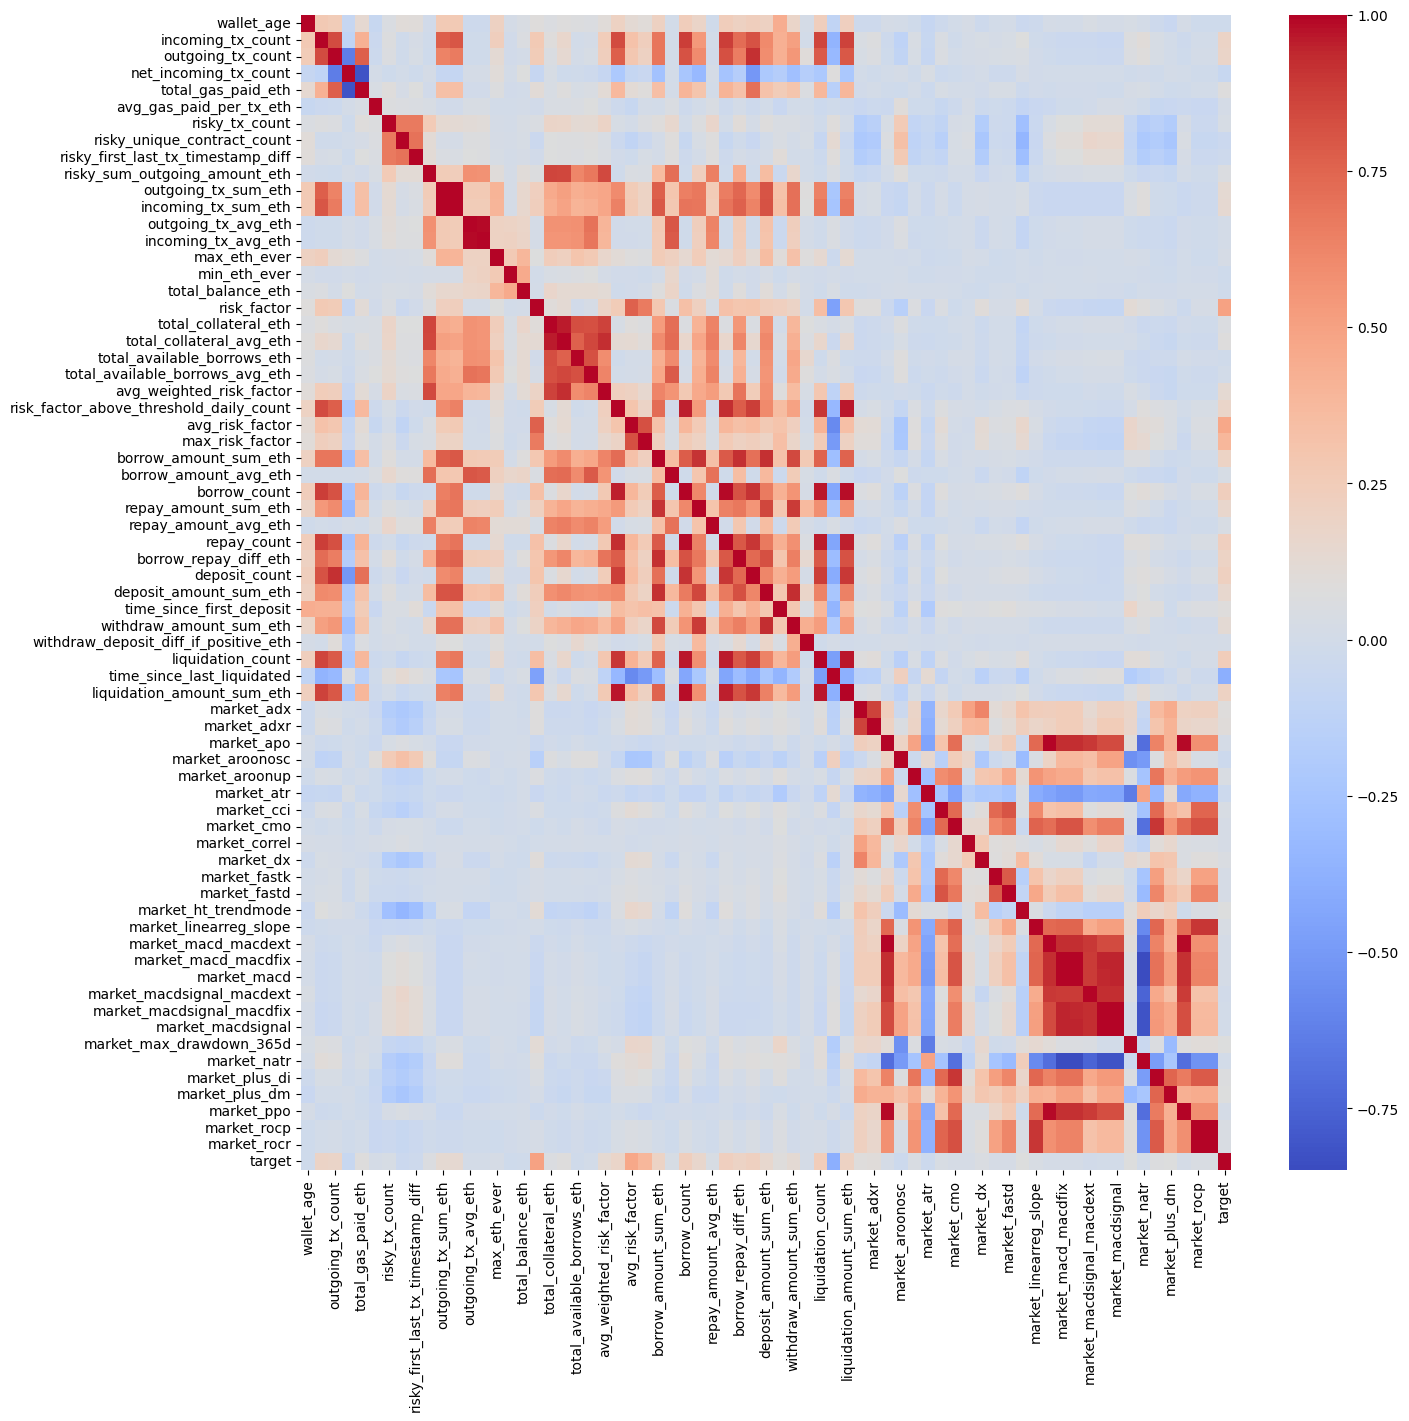

In [33]:
correlation_matrix = df_t0_columns_dropped[numeric_features].corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.show()

In [9]:
correlations = df_t0_columns_dropped.corr(numeric_only=True)['target'].dropna()
correlations_sorted = correlations.abs().sort_values(ascending=False)
top_correlated_variables = correlations_sorted.index[1:11]  
print("10 variables más correlacionadas con 'target':")
print(correlations[top_correlated_variables])


10 variables más correlacionadas con 'target':
risk_factor                   0.498964
avg_risk_factor               0.467638
max_risk_factor               0.391738
time_since_last_liquidated   -0.389695
liquidation_count             0.244964
borrow_count                  0.229686
repay_count                   0.226921
deposit_count                 0.213277
liquidation_amount_sum_eth    0.198720
borrow_repay_diff_eth         0.194440
Name: target, dtype: float64


In [ ]:
def find_correlated_attributes(df, threshold=0.8): #una correlación de 0.8 es bastante alta, que es lo buscado
    corr_matrix = df.corr()
    correlated_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                correlated_pairs.append({
                    'Attribute 1': corr_matrix.columns[i],
                    'Attribute 2': corr_matrix.columns[j],
                    'Correlation': corr_matrix.iloc[i, j]
                })
    correlated_df = pd.DataFrame(correlated_pairs)
    
    return correlated_df

In [10]:
correlated_attributes = find_correlated_attributes(df_t0_columns_dropped) # se usa un threshold de 0.8
correlated_attributes.head(50)

,Attribute 1,Attribute 2,Correlation
0,outgoing_tx_count,incoming_tx_count,0.836775
1,total_gas_paid_eth,net_incoming_tx_count,-0.812142
2,incoming_tx_sum_eth,outgoing_tx_sum_eth,0.998194
3,incoming_tx_avg_eth,outgoing_tx_avg_eth,0.992764
4,total_collateral_eth,risky_sum_outgoing_amount_eth,0.858686
5,total_collateral_avg_eth,risky_sum_outgoing_amount_eth,0.854890
6,total_collateral_avg_eth,total_collateral_eth,0.959850
7,total_available_borrows_eth,total_collateral_eth,0.826856
8,total_available_borrows_avg_eth,total_collateral_eth,0.822748
9,total_available_borrows_avg_eth,total_collateral_avg_eth,0.849873


Para visualizar la distribución de los datos, se realizará un histograma con estimaciones de densidas Kernel, cuyo objetivo es comparar las distribuciones de varias variables entre dos clases de la variable target.

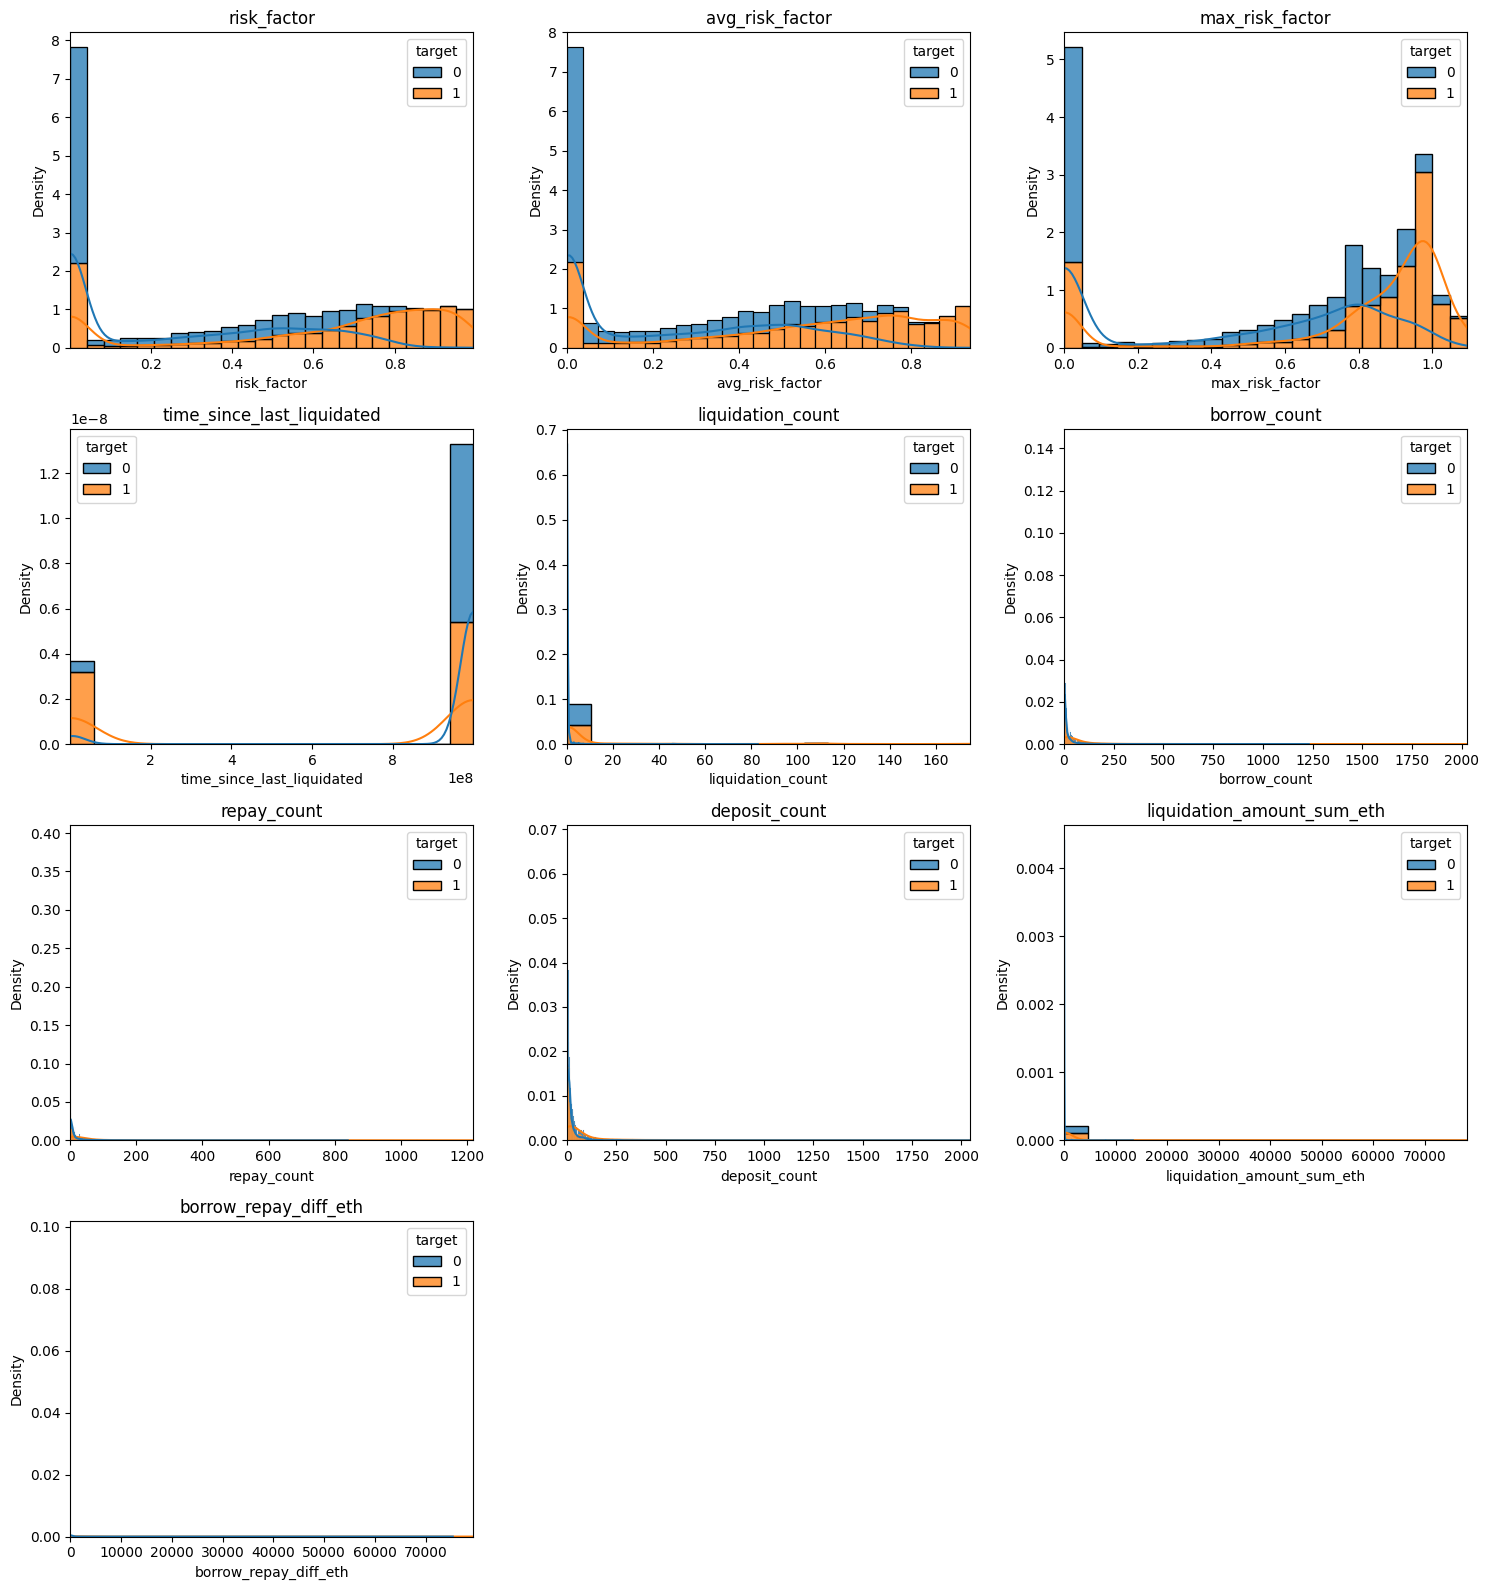

In [14]:
def plot_distributions_grid_stacked(df, max_plots_per_row=3, hue=None, normalize=False, clip_percentiles=(1, 99)):
    """
    Plots a grid of histograms with stacked bars and overlaid KDE lines for each column in a DataFrame.
    Each plot has its own scale for both X and Y axes.
    
    Parameters:
    - df (pd.DataFrame): DataFrame containing the data to plot.
    - max_plots_per_row (int): Maximum number of plots per row.
    - hue (str): Column name to use for coloring the plots (optional).
    - normalize (bool): Whether to normalize histograms for comparison.
    - clip_percentiles (tuple): Percentiles to clip the data for better visualization.
    """
    # Calculate the grid dimensions
    num_columns = len(df.columns)
    if hue in df.columns:
        num_columns -= 1  # Exclude hue column from plotting
    
    num_rows = int(np.ceil(num_columns / max_plots_per_row))
    
    fig, axes = plt.subplots(num_rows, max_plots_per_row, figsize=(5 * max_plots_per_row, 4 * num_rows))
    axes = axes.flatten()  # Flatten to make indexing easier
    
    columns_to_plot = [col for col in df.columns if col != hue]
    
    # Plot each column
    for i, column in enumerate(columns_to_plot):
        ax = axes[i]
        # Clip data to remove outliers
        lower, upper = np.percentile(df[column], clip_percentiles)
        clipped_data = df[(df[column] >= lower) & (df[column] <= upper)]
        
        if hue and hue in df.columns:
            # Plot stacked histogram
            sns.histplot(data=clipped_data, x=column, hue=hue, kde=False, 
                         stat='density' if normalize else 'count', ax=ax, element="bars", multiple="stack")
            # Add overlaid KDE lines
            sns.kdeplot(data=clipped_data, x=column, hue=hue, ax=ax, common_norm=normalize, legend=False)
        else:
            sns.histplot(clipped_data[column], kde=True, stat='density' if normalize else 'count', ax=ax)
        
        ax.set_title(column)
        ax.set_xlim(lower, upper)  # Set x-axis limits to clipped range
    
    # Remove unused subplots
    for j in range(len(columns_to_plot), len(axes)):
        fig.delaxes(axes[j])
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

to_plot_cols = top_correlated_variables.tolist() + ['target']
plot_distributions_grid_stacked(df_t0_columns_dropped[to_plot_cols], max_plots_per_row=3, hue='target', normalize=True)

Ahora, se estudia la distribución del conjunto de datos "X_t1", que son los datos sobre los que se hará predicciones para la primera entrega.

In [15]:
X_t1_iter_1 = pd.read_parquet(DATA_PATH + "X_t1_old.parquet")

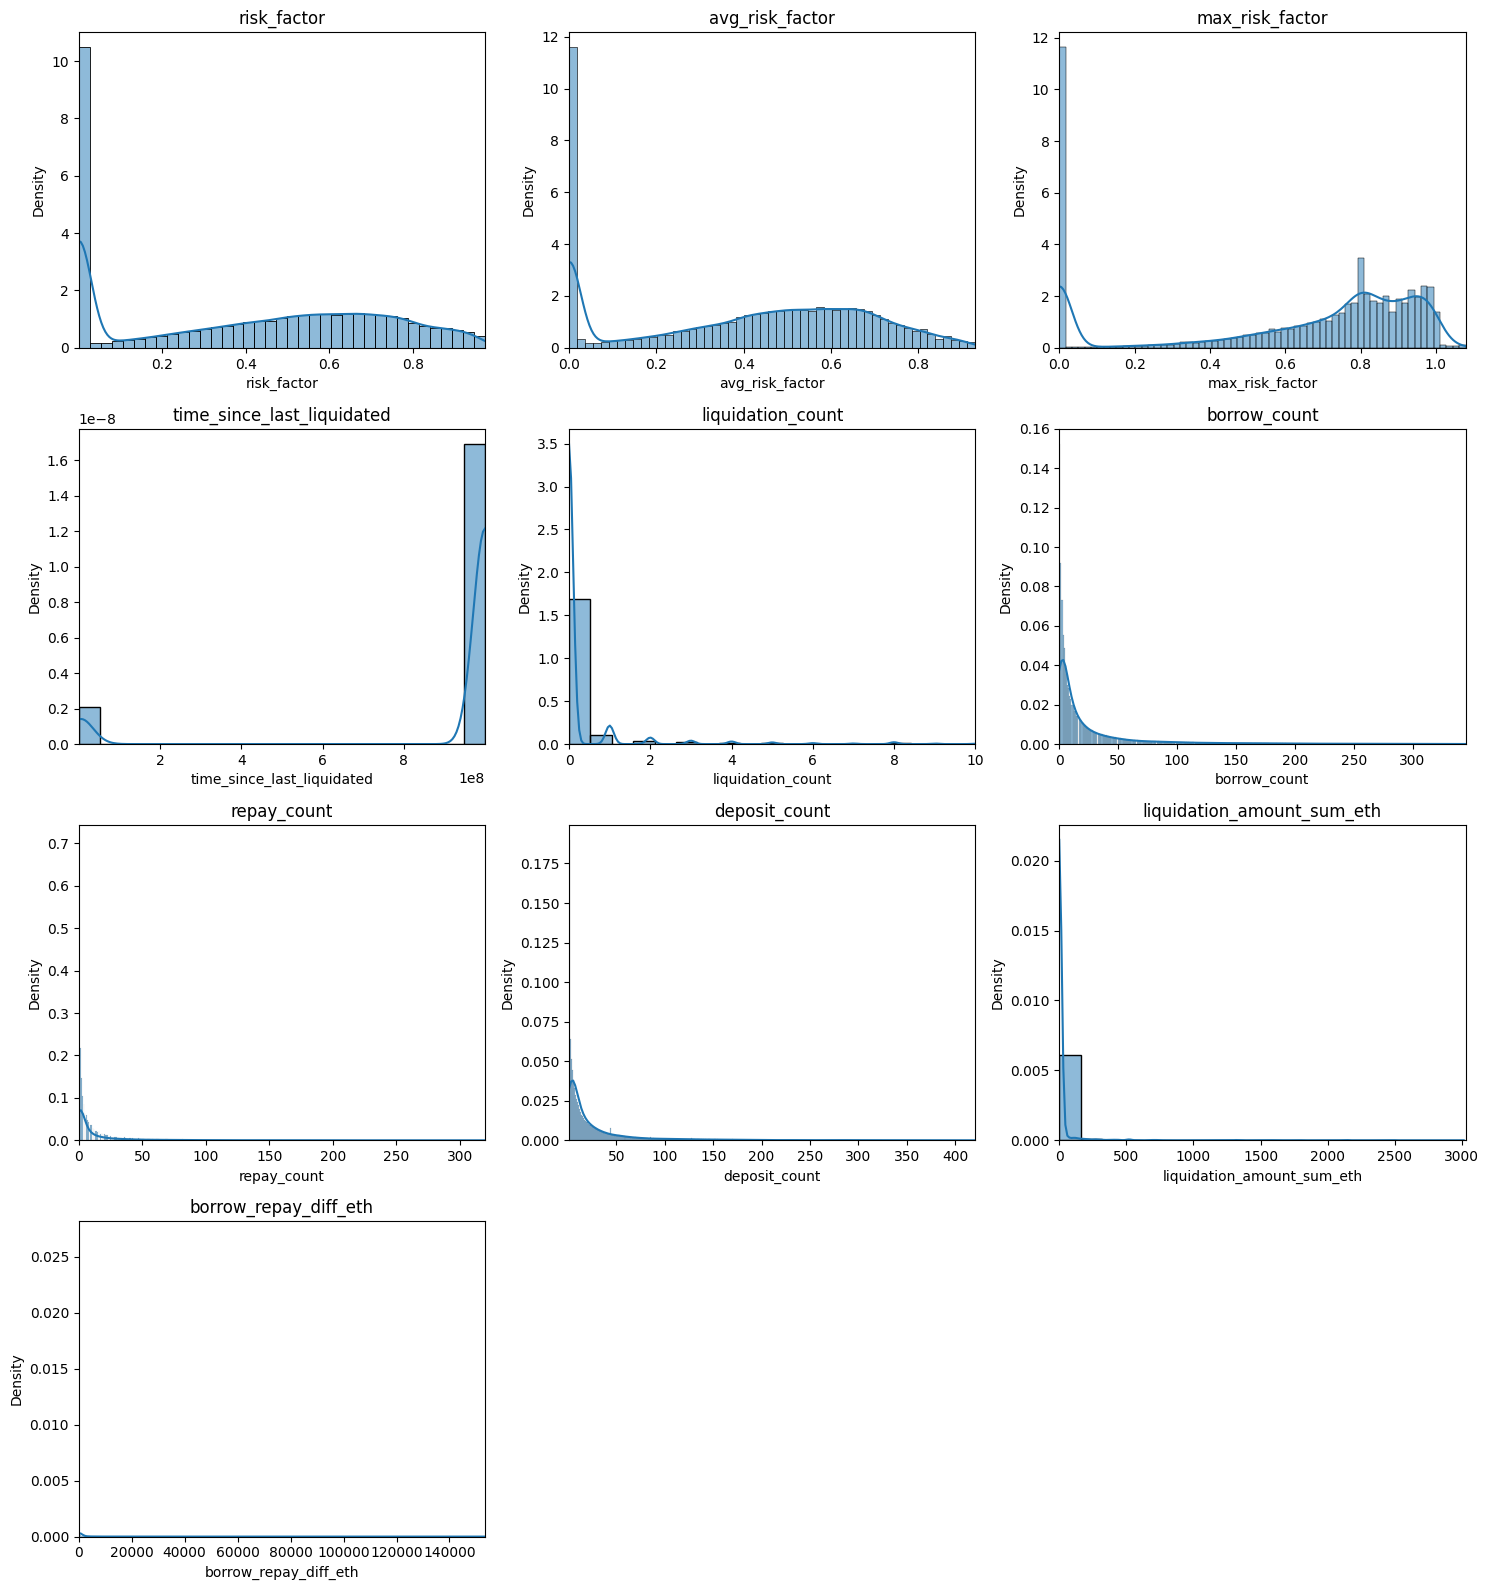

In [16]:
to_plot_cols_X_t1_iter_1 = top_correlated_variables.tolist()
plot_distributions_grid_stacked(X_t1_iter_1[to_plot_cols_X_t1_iter_1], max_plots_per_row=3, hue='target', normalize=True)

In [11]:
X_t1_iter_2 = pd.read_parquet(DATA_PATH + "X_t1_new.parquet")

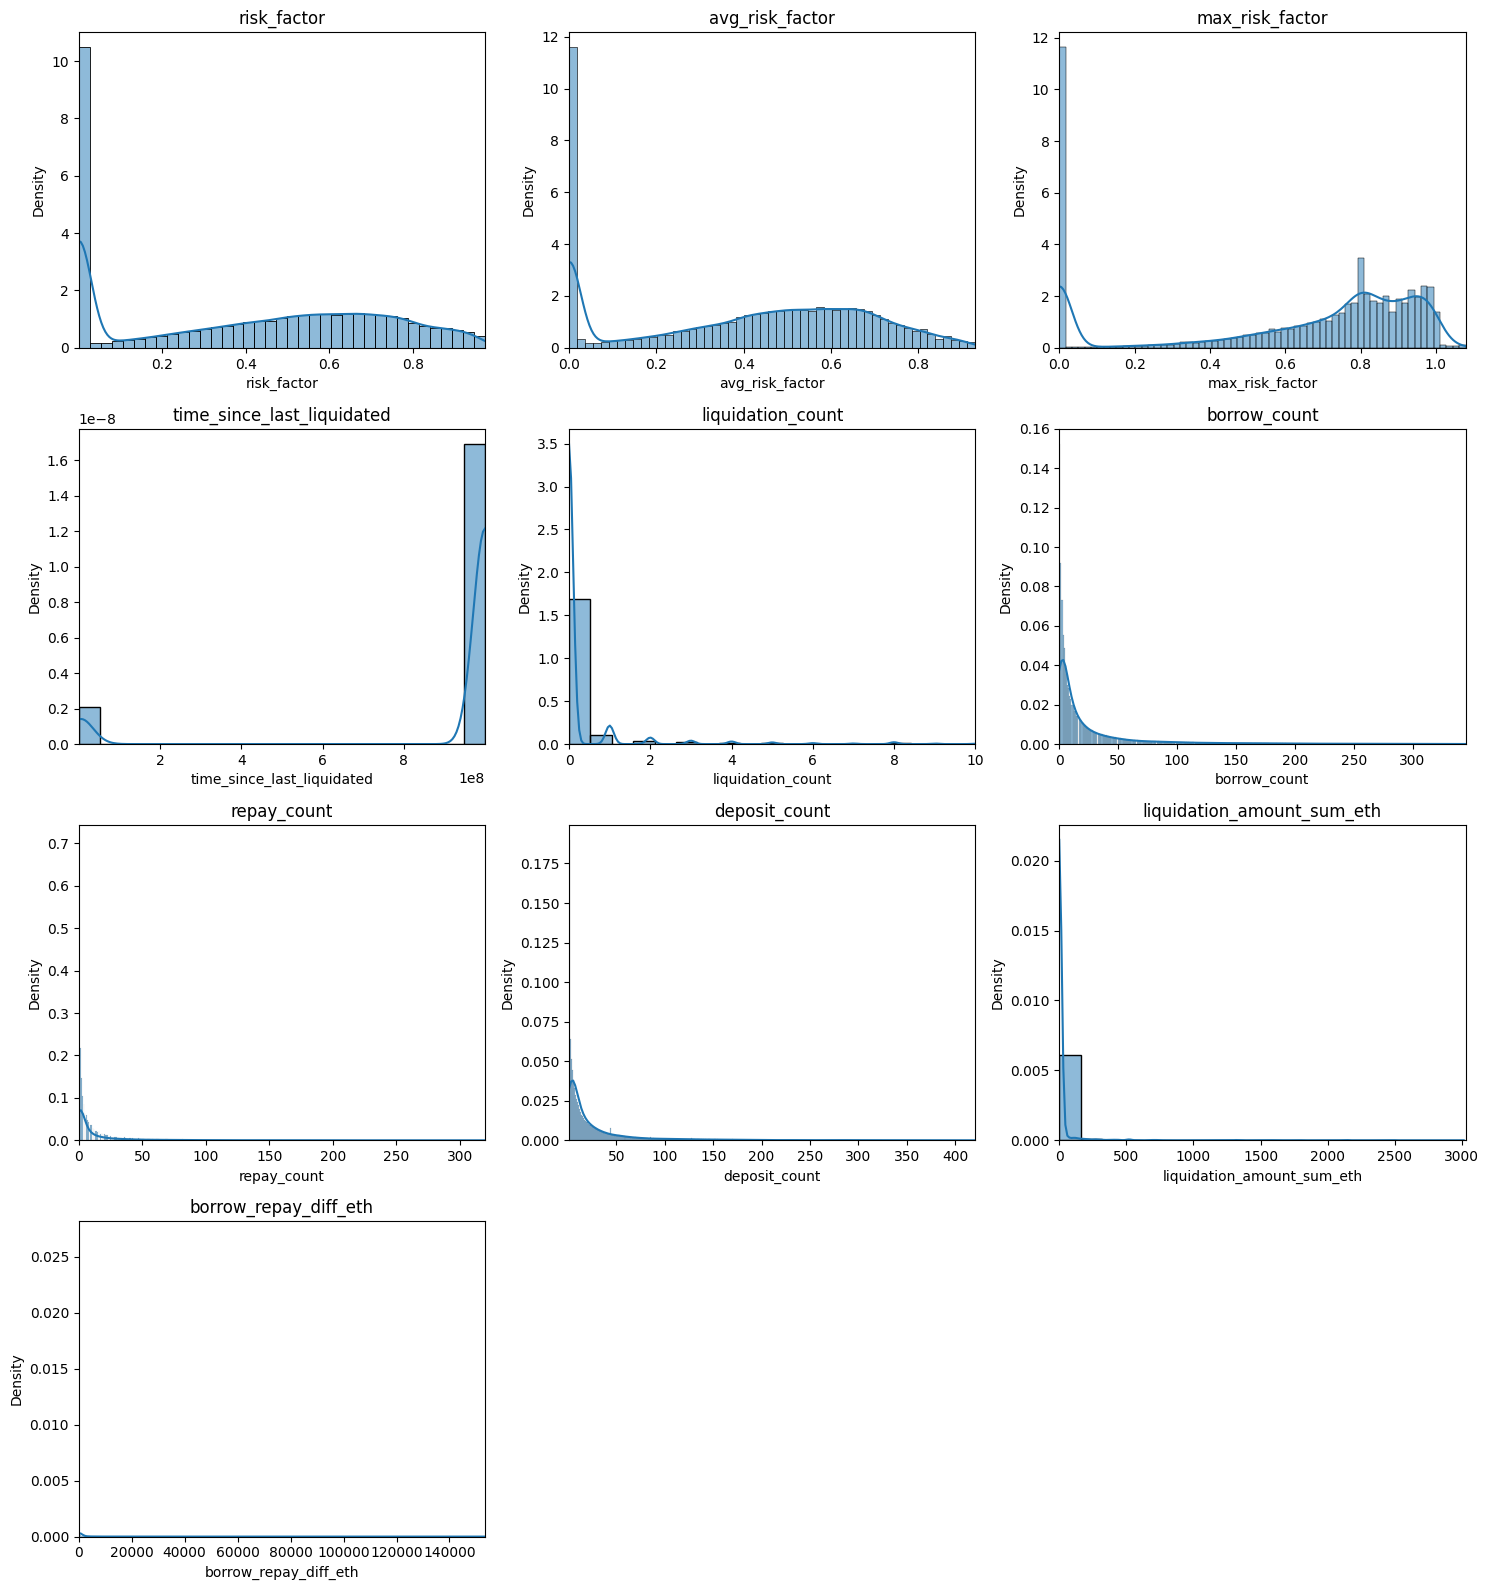

In [17]:
to_plot_cols_X_t1_iter_1 = top_correlated_variables.tolist()
plot_distributions_grid_stacked(X_t1_iter_1[to_plot_cols_X_t1_iter_1], max_plots_per_row=3, hue='target', normalize=True)

## **Entrenamiento de modelos de ML**

Luego de un primer acercamiento a los datos, se procede a realizar un preprocesamiento de estos:
   - Estandarización de filas y/o columnas.  
   - Reducción de dimensionalidad.  
   - Discretización de variables numéricas a categóricas.  
   - Manejo de datos nulos.  
   - Otras transformaciones relevantes según los datos disponibles.  


**Eso es lo recomendado, no estoy seguro si lo hicimos todo o aún no**


#### **División de los datos**

#### **Preparación de pipelines**

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA

# Pipeline para características numéricas con PCA
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),   # Hay que ver si distributen normal o es mejor otro scaler
#    ('pca', PCA(n_components=50))  # Reduce a 50 componentes principales
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features.drop('target')),  # Numéricas con PCA
        ('cat', categorical_transformer, categorical_features)  # Categóricas con OneHot
    ]
)


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X_t0, y_t0, train_size=0.7, stratify=y_t0, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, train_size=0.5, stratify=y_temp, random_state=42)
X_train.shape, X_val.shape, X_test.shape

((31007, 77), (6644, 77), (6645, 77))

In [19]:
X_train = pd.DataFrame(X_train, columns=X_t0.columns)
X_val = pd.DataFrame(X_val, columns=X_t0.columns)
X_test = pd.DataFrame(X_test, columns=X_t0.columns)

y_train = np.array(y_train).ravel()
y_val = np.array(y_val).ravel()
y_test = np.array(y_test).ravel()

## Baseline
Se implementa un baseline, para ello se elige Decision Tree como modelo y se crea una función que englobe los Pipelines y retorne métricas de interés. En lo siguiente, consideraremos como métrica objetivo la **INSERTAR MÉTRICA** (DE MOMENTO CONSIDERO EL AUC, PUEDE SER OTRA)

#### **Decision Tree Classifier**

In [26]:
from sklearn.base import BaseEstimator
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    roc_auc_score, 
    confusion_matrix, 
    classification_report
)
from sklearn.pipeline import Pipeline
import pandas as pd

def train_model(
    model: BaseEstimator,
    X_train: pd.DataFrame, 
    y_train: pd.Series,
    X_val: pd.DataFrame, 
    y_val: pd.Series,
) -> Pipeline:
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    pipe.fit(X_train, y_train)
    
    # Predicciones para el conjunto de entrenamiento y validación
    y_train_pred = pipe.predict(X_train)
    y_val_pred = pipe.predict(X_val)
    
    # Calcular AUC 
    if hasattr(pipe, "predict_proba"):
        y_train_proba = pipe.predict_proba(X_train)[:, 1]
        y_val_proba = pipe.predict_proba(X_val)[:, 1]
        train_auc = roc_auc_score(y_train, y_train_proba)
        val_auc = roc_auc_score(y_val, y_val_proba)
    else:
        train_auc = val_auc = "N/A (predict_proba not supported)"
    
    # todas las métricas q me acuerdo
    print(f"Model to train: {model.__class__.__name__}")
    print("\n--- Training Metrics ---")
    print(f"Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
    print(f"Precision: {precision_score(y_train, y_train_pred, average='binary'):.4f}")
    print(f"Recall: {recall_score(y_train, y_train_pred, average='binary'):.4f}")
    print(f"F1-score: {f1_score(y_train, y_train_pred, average='binary'):.4f}")
    print(f"AUC: {train_auc}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_train, y_train_pred))
    print("\nClassification Report:")
    print(classification_report(y_train, y_train_pred))
    
    # Calcular y mostrar métricas para validación
    print("\n--- Validation Metrics ---")
    print(f"Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")
    print(f"Precision: {precision_score(y_val, y_val_pred, average='binary'):.4f}")
    print(f"Recall: {recall_score(y_val, y_val_pred, average='binary'):.4f}")
    print(f"F1-score: {f1_score(y_val, y_val_pred, average='binary'):.4f}")
    print(f"AUC: {val_auc}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_val, y_val_pred))
    print("\nClassification Report:")
    print(classification_report(y_val, y_val_pred))
    
    return pipe


In [28]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_pipe = train_model(DecisionTreeClassifier(), X_train, y_train, X_val, y_val)


# Todo lo comentado se borrará en la próxima iteración, de momento lo dejo por si hace falta después



# get the tree
#tree = decision_tree_pipe.named_steps['classifier']
## get the feature importances
#importances = tree.feature_importances_
## get the feature names
#feature_names = X_train.columns
# sort them
#indices = np.argsort(importances)[::-1]#

## plot the feature importances
##plt.figure(figsize=(12, 6))
##plt.title("Feature importances")
##preprocessed_X_train = decision_tree_pipe.named_steps['preprocessor'].transform(X_train)
##plt.bar(range(preprocessed_X_train.shape[1]), importances[indices],
##        align="center")
##
#plt.xticks(range(preprocessed_X_train.shape[1]), np.array(feature_names)[indices], rotation=90)
#plt.xlim([-1, preprocessed_X_train.shape[1]])
#plt.show()

Model to train: DecisionTreeClassifier

--- Training Metrics ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
AUC: 1.0
Confusion Matrix:
[[15148     0]
 [    0 15859]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15148
           1       1.00      1.00      1.00     15859

    accuracy                           1.00     31007
   macro avg       1.00      1.00      1.00     31007
weighted avg       1.00      1.00      1.00     31007


--- Validation Metrics ---
Accuracy: 0.8274
Precision: 0.8269
Recall: 0.8378
F1-score: 0.8323
AUC: 0.8271175969917428
Confusion Matrix:
[[2650  596]
 [ 551 2847]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      3246
           1       0.83      0.84      0.83      3398

    accuracy                           0.83      6644
   macro avg       0.83      0.83      0.83      6644

## Modelos de ML

Hecho el baseline, se implementará Random Forest, XGBoost, CatBoost y luego se utilizará Pycaret para explorar otros modelos que considere la librería.

##### **Random Forest Classifier**

In [29]:
from sklearn.ensemble import RandomForestClassifier
random_forest_pipe = train_model(RandomForestClassifier(), X_train, y_train, X_val, y_val)


# get the tree
#tree = random_forest_pipe.named_steps['classifier']
## get the feature importances
#importances = tree.feature_importances_
## get the feature names
#feature_names = X_train.columns
## sort them
#indices = np.argsort(importances)[::-1]
#
## plot the feature importances
#plt.figure(figsize=(12, 6))
#plt.title("Feature importances")
#preprocessed_X_train = random_forest_pipe.named_steps['preprocessor'].transform(X_train)
#plt.bar(range(preprocessed_X_train.shape[1]), importances[indices],
#        align="center")
#
#plt.xticks(range(preprocessed_X_train.shape[1]), np.array(feature_names)[indices], rotation=90)
#plt.xlim([-1, preprocessed_X_train.shape[1]])
#plt.show()

Model to train: RandomForestClassifier

--- Training Metrics ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
AUC: 1.0
Confusion Matrix:
[[15148     0]
 [    0 15859]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15148
           1       1.00      1.00      1.00     15859

    accuracy                           1.00     31007
   macro avg       1.00      1.00      1.00     31007
weighted avg       1.00      1.00      1.00     31007


--- Validation Metrics ---
Accuracy: 0.8948
Precision: 0.9341
Recall: 0.8546
F1-score: 0.8926
AUC: 0.9594787191334688
Confusion Matrix:
[[3041  205]
 [ 494 2904]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      3246
           1       0.93      0.85      0.89      3398

    accuracy                           0.89      6644
   macro avg       0.90      0.90      0.89      6644

#### **XGBoost**

In [30]:
from xgboost import XGBClassifier

# Entrenar el modelo con XGBoost
xgboost_pipe = train_model(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), 
                           X_train, y_train, X_val, y_val)

## Obtener el modelo entrenado
#xgb_model = xgboost_pipe.named_steps['classifier']
#
## Obtener importancias de características
#importances = xgb_model.feature_importances_
#feature_names = X_train.columns
#indices = np.argsort(importances)[::-1]
#
## Graficar la importancia de las características
#plt.figure(figsize=(12, 6))
#plt.title("Feature Importances (XGBoost)")
#preprocessed_X_train = xgboost_pipe.named_steps['preprocessor'].transform(X_train)
#plt.bar(range(preprocessed_X_train.shape[1]), importances[indices], align="center")
#plt.xticks(range(preprocessed_X_train.shape[1]), np.array(feature_names)[indices], rotation=90)
#plt.xlim([-1, preprocessed_X_train.shape[1]])
#plt.show()

Model to train: XGBClassifier

--- Training Metrics ---
Accuracy: 0.9512
Precision: 0.9786
Recall: 0.9248
F1-score: 0.9510
AUC: 0.9916981588457949
Confusion Matrix:
[[14828   320]
 [ 1192 14667]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     15148
           1       0.98      0.92      0.95     15859

    accuracy                           0.95     31007
   macro avg       0.95      0.95      0.95     31007
weighted avg       0.95      0.95      0.95     31007


--- Validation Metrics ---
Accuracy: 0.8850
Precision: 0.9147
Recall: 0.8549
F1-score: 0.8838
AUC: 0.9515175013245804
Confusion Matrix:
[[2975  271]
 [ 493 2905]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      3246
           1       0.91      0.85      0.88      3398

    accuracy                           0.89      6644
   macro avg       0.89      0.89      0.88    

#### **LGBoost**

In [31]:
from lightgbm import LGBMClassifier

# Entrenar el modelo con LightGBM
lightgbm_pipe = train_model(LGBMClassifier(), X_train, y_train, X_val, y_val)

## Obtener el modelo entrenado
#lgb_model = lightgbm_pipe.named_steps['classifier']
#
## Obtener importancias de características
#importances = lgb_model.feature_importances_
#feature_names = X_train.columns
#indices = np.argsort(importances)[::-1]
#
#plt.figure(figsize=(12, 6))
#plt.title("Feature Importances (LightGBM)")
#preprocessed_X_train = lightgbm_pipe.named_steps['preprocessor'].transform(X_train)
#plt.bar(range(preprocessed_X_train.shape[1]), importances[indices], align="center")
#plt.xticks(range(preprocessed_X_train.shape[1]), np.array(feature_names)[indices], rotation=90)
#plt.xlim([-1, preprocessed_X_train.shape[1]])
#plt.show()

[LightGBM] [Info] Number of positive: 15859, number of negative: 15148
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.031683 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15502
[LightGBM] [Info] Number of data points in the train set: 31007, number of used features: 68
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.511465 -> initscore=0.045869
[LightGBM] [Info] Start training from score 0.045869
Model to train: LGBMClassifier

--- Training Metrics ---
Accuracy: 0.8817
Precision: 0.9371
Recall: 0.8241
F1-score: 0.8770
AUC: 0.9576119359420247
Confusion Matrix:
[[14271   877]
 [ 2790 13069]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89     15148
           1       0.94      0.82      0.88     15859

    accuracy                           0.88     31007
   macro avg       0.89      0.88      0.88     31007
weighted avg  

#### **CatBoost**

In [32]:
from catboost import CatBoostClassifier

catboost_pipe = train_model(CatBoostClassifier(verbose=0), X_train, y_train, X_val, y_val)

#cat_model = catboost_pipe.named_steps['classifier']
#
#importances = cat_model.feature_importances_
#feature_names = X_train.columns
#indices = np.argsort(importances)[::-1]
#
#plt.figure(figsize=(12, 6))
#plt.title("Feature Importances (CatBoost)")
#preprocessed_X_train = catboost_pipe.named_steps['preprocessor'].transform(X_train)
#plt.bar(range(preprocessed_X_train.shape[1]), importances[indices], align="center")
#plt.xticks(range(preprocessed_X_train.shape[1]), np.array(feature_names)[indices], rotation=90)
#plt.xlim([-1, preprocessed_X_train.shape[1]])
#plt.show()

Model to train: CatBoostClassifier

--- Training Metrics ---
Accuracy: 0.9236
Precision: 0.9598
Recall: 0.8877
F1-score: 0.9224
AUC: 0.9801150351527497
Confusion Matrix:
[[14559   589]
 [ 1781 14078]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92     15148
           1       0.96      0.89      0.92     15859

    accuracy                           0.92     31007
   macro avg       0.93      0.92      0.92     31007
weighted avg       0.93      0.92      0.92     31007


--- Validation Metrics ---
Accuracy: 0.8769
Precision: 0.9167
Recall: 0.8352
F1-score: 0.8740
AUC: 0.9453913396195146
Confusion Matrix:
[[2988  258]
 [ 560 2838]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      3246
           1       0.92      0.84      0.87      3398

    accuracy                           0.88      6644
   macro avg       0.88      0.88      0.8

In [137]:
from pycaret.classification import *
import os

os.environ["PYCARET_CUSTOM_LOGGING_LEVEL"] = "CRITICAL"

exp1 = setup(data = df_t0, target = 'target', use_gpu=True, experiment_name='exp1')

ImportError: cannot import name '_print_elapsed_time' from 'sklearn.utils' (c:\Users\nicol\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\__init__.py)

In [138]:
best_model = compare_models()

NameError: name 'compare_models' is not defined

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
import numpy as np

X_train = X_train.drop(columns=['wallet_address'])
X_test = X_test.drop(columns=['wallet_address'])

def forward_feature_selection(X, y, model, scoring='accuracy', cv=5):
    selected_features = []
    remaining_features = list(X.columns)
    best_score = -np.inf

    while remaining_features:
        scores = []
        for feature in remaining_features:
            current_features = selected_features + [feature]
            X_subset = X[current_features]
            score = cross_val_score(model, X_subset, y, scoring=scoring, cv=cv).mean()
            scores.append((score, feature))
        
        scores.sort(reverse=True, key=lambda x: x[0])
        best_current_score, best_feature = scores[0]

        if best_current_score > best_score:
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
            best_score = best_current_score
            print(f"Feature added: {best_feature}, New score: {best_current_score}")
        else:
            break

    return selected_features

lgb_model = lgb.LGBMClassifier(random_state=42, verbose=-1)

selected_features = forward_feature_selection(X_train, y_train, lgb_model, scoring='accuracy', cv=5)

print("\nCaracterísticas seleccionadas:")
print(selected_features)


**Interpretabilidad del modelo con mejores resultados**  
De lo anterior, el modelo con mejores resultados es Extra Trees Classifier en AUC, veamos la interpretabilidad del modelo para comprender en base a qué toma decisiones el modelo y así justificar sus resultados.

Model to train: ExtraTreesClassifier

--- Training Metrics ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
AUC: 1.0
Confusion Matrix:
[[15148     0]
 [    0 15859]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15148
           1       1.00      1.00      1.00     15859

    accuracy                           1.00     31007
   macro avg       1.00      1.00      1.00     31007
weighted avg       1.00      1.00      1.00     31007


--- Validation Metrics ---
Accuracy: 0.8837
Precision: 0.9121
Recall: 0.8549
F1-score: 0.8826
AUC: 0.9473881377795715
Confusion Matrix:
[[2966  280]
 [ 493 2905]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      3246
           1       0.91      0.85      0.88      3398

    accuracy                           0.88      6644
   macro avg       0.88      0.88      0.88      6644
w

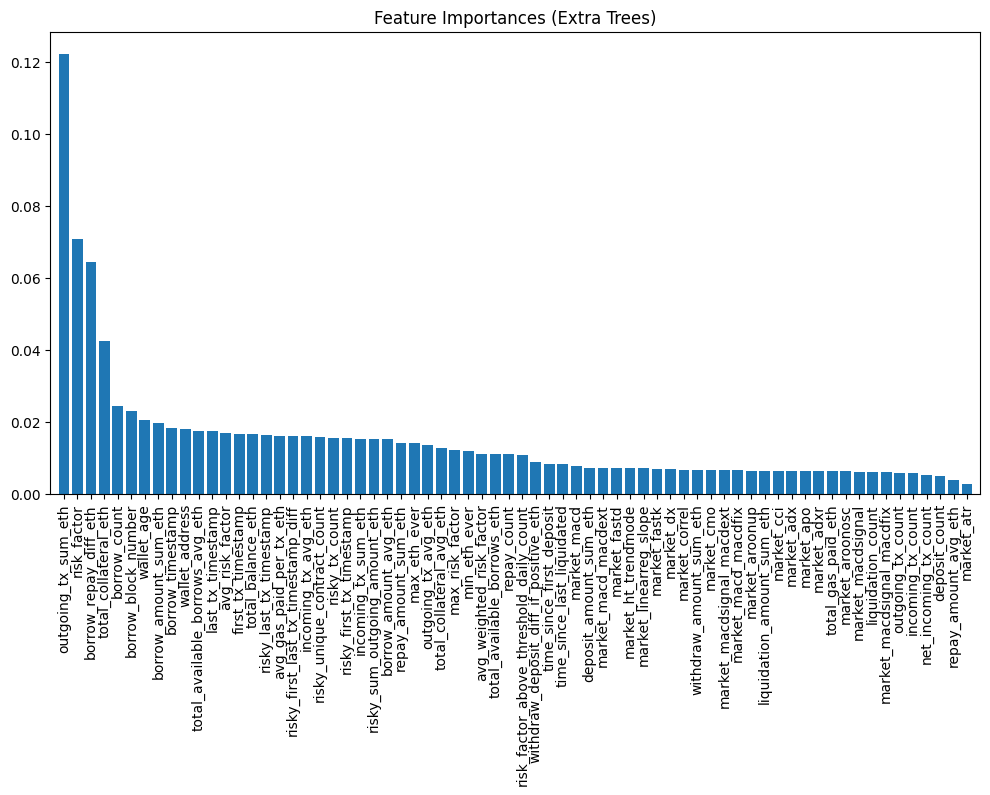

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

extra_tree_pipe = train_model(ExtraTreesClassifier(n_estimators=100, random_state=42), 
                              X_train, y_train, X_val, y_val)
et_model = extra_tree_pipe.named_steps['classifier']
importances = et_model.feature_importances_
feature_names = X_train.columns 
indices = np.argsort(importances)[::-1] 

plt.figure(figsize=(12, 6))
plt.title("Feature Importances (Extra Trees)")
preprocessed_X_train = extra_tree_pipe.named_steps['preprocessor'].transform(X_train)

plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), np.array(feature_names)[indices], rotation=90)
plt.xlim([-1, len(importances)])
plt.show()
